## showing surface timeseries surface S, T, PP, pH, 

Plots that I would like – full year time series for surface (or average-3m)  S, T, PP, pH for 4 locations.

2 locations in the ‘plume’ region and 2 location in the ‘fjord’ region:

{Choosing 2 to try to make sure that we don’t pick a weird one by chance – I want typical - e.g. you showed that there were some variations esp in the north-fjord zone – see p11 of ‘first-look-massblanance.pdf October surface map - try to get one station in the ‘blue’ and one in the red.. for the north - hopefully makes sense.}

Show 2 annual traces for each property and location together: base run – and run with different hydrography.

Thanks-

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import arrow
import glob
import sys

sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
sys.path.append('./bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
import extract_bylayer_mean as ebm
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

In [5]:
reload(ebmBOX)
reload(ebm)

<module 'extract_bylayer_mean' from './bylayer_extract/extract_bylayer_mean.py'>

### [A] Map definition and station definition

## extractions in ebmBOX_and_ebm_BASE.ipynb and ebmBOX_and_ebm_SHIFT.ipynb

#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [6]:
#extract means for BR1-BR3, get fraser discharge
#var

BASE_var = pickle.load(open('./pkls/BASE_DIC_means_inletsIN.pkl' , 'rb')) 
SHIFT_var = pickle.load(open('./pkls/SHIFT_DIC_means_inletsIN.pkl' , 'rb')) 

BASE_var[BASE_var == 0] = np.nan
SHIFT_var[SHIFT_var == 0] = np.nan

#Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run


#### load all DIC data for SHIFT and BASE 

In [7]:
BASE_DIC_cs = pickle.load(open('./pkls/BASE_DIC_means_cs_BOX.pkl','rb'))
SHIFT_DIC_cs = pickle.load(open('./pkls/SHIFT_DIC_means_cs_BOX.pkl','rb'))
BASE_DIC_cs2 = pickle.load(open('./pkls/BASE_DIC_means_cs2_BOX.pkl','rb'))
SHIFT_DIC_cs2 = pickle.load(open('./pkls/SHIFT_DIC_means_cs2_BOX.pkl','rb'))
BASE_DIC_cs3 = pickle.load(open('./pkls/BASE_DIC_means_cs3_BOX.pkl','rb'))
SHIFT_DIC_cs3 = pickle.load(open('./pkls/SHIFT_DIC_means_cs3_BOX.pkl','rb'))

BASE_DIC_ns = pickle.load(open('./pkls/BASE_DIC_means_ns_BOX.pkl','rb'))
SHIFT_DIC_ns = pickle.load(open('./pkls/SHIFT_DIC_means_ns_BOX.pkl','rb'))
BASE_DIC_ns2 = pickle.load(open('./pkls/BASE_DIC_means_ns2_BOX.pkl','rb'))
SHIFT_DIC_ns2 = pickle.load(open('./pkls/SHIFT_DIC_means_ns2_BOX.pkl','rb'))
BASE_DIC_ns3 = pickle.load(open('./pkls/BASE_DIC_means_ns3_BOX.pkl','rb'))
SHIFT_DIC_ns3 = pickle.load(open('./pkls/SHIFT_DIC_means_ns3_BOX.pkl','rb'))

BASE_temp_cs = pickle.load(open('./pkls/BASE_temp_means_cs_BOX.pkl','rb'))
SHIFT_temp_cs = pickle.load(open('./pkls/SHIFT_temp_means_cs_BOX.pkl','rb'))
BASE_temp_cs2 = pickle.load(open('./pkls/BASE_temp_means_cs2_BOX.pkl','rb'))
SHIFT_temp_cs2 = pickle.load(open('./pkls/SHIFT_temp_means_cs2_BOX.pkl','rb'))
BASE_temp_cs3 = pickle.load(open('./pkls/BASE_temp_means_cs3_BOX.pkl','rb'))
SHIFT_temp_cs3 = pickle.load(open('./pkls/SHIFT_temp_means_cs3_BOX.pkl','rb'))

BASE_temp_ns = pickle.load(open('./pkls/BASE_temp_means_ns_BOX.pkl','rb'))
SHIFT_temp_ns = pickle.load(open('./pkls/SHIFT_temp_means_ns_BOX.pkl','rb'))
BASE_temp_ns2 = pickle.load(open('./pkls/BASE_temp_means_ns2_BOX.pkl','rb'))
SHIFT_temp_ns2 = pickle.load(open('./pkls/SHIFT_temp_means_ns2_BOX.pkl','rb'))
BASE_temp_ns3 = pickle.load(open('./pkls/BASE_temp_means_ns3_BOX.pkl','rb'))
SHIFT_temp_ns3 = pickle.load(open('./pkls/SHIFT_temp_means_ns3_BOX.pkl','rb'))

BASE_sal_cs = pickle.load(open('./pkls/BASE_sal_means_cs_BOX.pkl','rb'))
SHIFT_sal_cs = pickle.load(open('./pkls/SHIFT_sal_means_cs_BOX.pkl','rb'))
BASE_sal_cs2 = pickle.load(open('./pkls/BASE_sal_means_cs2_BOX.pkl','rb'))
SHIFT_sal_cs2 = pickle.load(open('./pkls/SHIFT_sal_means_cs2_BOX.pkl','rb'))
BASE_sal_cs3 = pickle.load(open('./pkls/BASE_sal_means_cs3_BOX.pkl','rb'))
SHIFT_sal_cs3 = pickle.load(open('./pkls/SHIFT_sal_means_cs3_BOX.pkl','rb'))

BASE_sal_ns = pickle.load(open('./pkls/BASE_sal_means_ns_BOX.pkl','rb'))
SHIFT_sal_ns = pickle.load(open('./pkls/SHIFT_sal_means_ns_BOX.pkl','rb'))
BASE_sal_ns2 = pickle.load(open('./pkls/BASE_sal_means_ns2_BOX.pkl','rb'))
SHIFT_sal_ns2 = pickle.load(open('./pkls/SHIFT_sal_means_ns2_BOX.pkl','rb'))
BASE_sal_ns3 = pickle.load(open('./pkls/BASE_sal_means_ns3_BOX.pkl','rb'))
SHIFT_sal_ns3 = pickle.load(open('./pkls/SHIFT_sal_means_ns3_BOX.pkl','rb'))

BASE_diat_cs = pickle.load(open('./pkls/BASE_diat_means_cs_BOX.pkl','rb'))
SHIFT_diat_cs = pickle.load(open('./pkls/SHIFT_diat_means_cs_BOX.pkl','rb'))
BASE_diat_cs2 = pickle.load(open('./pkls/BASE_diat_means_cs2_BOX.pkl','rb'))
SHIFT_diat_cs2 = pickle.load(open('./pkls/SHIFT_diat_means_cs2_BOX.pkl','rb'))
BASE_diat_cs3 = pickle.load(open('./pkls/BASE_diat_means_cs3_BOX.pkl','rb'))
SHIFT_diat_cs3 = pickle.load(open('./pkls/SHIFT_diat_means_cs3_BOX.pkl','rb'))

BASE_diat_ns = pickle.load(open('./pkls/BASE_diat_means_ns_BOX.pkl','rb'))
SHIFT_diat_ns = pickle.load(open('./pkls/SHIFT_diat_means_ns_BOX.pkl','rb'))
BASE_diat_ns2 = pickle.load(open('./pkls/BASE_diat_means_ns2_BOX.pkl','rb'))
SHIFT_diat_ns2 = pickle.load(open('./pkls/SHIFT_diat_means_ns2_BOX.pkl','rb'))
BASE_diat_ns3 = pickle.load(open('./pkls/BASE_diat_means_ns3_BOX.pkl','rb'))
SHIFT_diat_ns3 = pickle.load(open('./pkls/SHIFT_diat_means_ns3_BOX.pkl','rb'))

BASE_TA_cs = pickle.load(open('./pkls/BASE_TA_means_cs_BOX.pkl','rb'))
SHIFT_TA_cs = pickle.load(open('./pkls/SHIFT_TA_means_cs_BOX.pkl','rb'))
BASE_TA_cs2 = pickle.load(open('./pkls/BASE_TA_means_cs2_BOX.pkl','rb'))
SHIFT_TA_cs2 = pickle.load(open('./pkls/SHIFT_TA_means_cs2_BOX.pkl','rb'))
BASE_TA_cs3 = pickle.load(open('./pkls/BASE_TA_means_cs3_BOX.pkl','rb'))
SHIFT_TA_cs3 = pickle.load(open('./pkls/SHIFT_TA_means_cs3_BOX.pkl','rb'))

BASE_TA_ns = pickle.load(open('./pkls/BASE_TA_means_ns_BOX.pkl','rb'))
SHIFT_TA_ns = pickle.load(open('./pkls/SHIFT_TA_means_ns_BOX.pkl','rb'))
BASE_TA_ns2 = pickle.load(open('./pkls/BASE_TA_means_ns2_BOX.pkl','rb'))
SHIFT_TA_ns2 = pickle.load(open('./pkls/SHIFT_TA_means_ns2_BOX.pkl','rb'))
BASE_TA_ns3 = pickle.load(open('./pkls/BASE_TA_means_ns3_BOX.pkl','rb'))
SHIFT_TA_ns3 = pickle.load(open('./pkls/SHIFT_TA_means_ns3_BOX.pkl','rb'))

In [8]:
def OmA_2D(tsal, ttemp, tdic, tta):

    
    test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
    zlevels = (test_LO['deptht'][:])

    depths = np.zeros([40,365])

    for j in range(0,365):
        depths[:,j] = zlevels
            
    tdepths = np.ravel(depths)
    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tpressure[:] =1
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tdepths)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepths, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(40,365)
    OmAr = OmegaA.reshape(40,365)
    OmCr = OmegaC.reshape(40,365)
    pco2r = pco2.reshape(40,365)
    
    return pHr, OmAr, OmCr, pco2r

In [9]:
BASE_pH_cs, BASE_OmA_cs, BASE_OmC_cs, BASE_pco2_cs = OmA_2D(BASE_sal_cs, BASE_temp_cs, BASE_DIC_cs, BASE_TA_cs)
BASE_pH_cs2, BASE_OmA_cs2, BASE_OmC_cs2, BASE_pco2_cs2 = OmA_2D(BASE_sal_cs2, BASE_temp_cs2, BASE_DIC_cs2, BASE_TA_cs2)
BASE_pH_cs3, BASE_OmA_cs3, BASE_OmC_cs3, BASE_pco2_cs3 = OmA_2D(BASE_sal_cs3, BASE_temp_cs3, BASE_DIC_cs3, BASE_TA_cs3)

BASE_pH_ns, BASE_OmA_ns, BASE_OmC_ns, BASE_pco2_ns = OmA_2D(BASE_sal_ns, BASE_temp_ns, BASE_DIC_ns, BASE_TA_ns)
BASE_pH_ns2, BASE_OmA_ns2, BASE_OmC_ns2, BASE_pco2_ns2 = OmA_2D(BASE_sal_ns2, BASE_temp_ns2, BASE_DIC_ns2, BASE_TA_ns2)
BASE_pH_ns3, BASE_OmA_ns3, BASE_OmC_ns3, BASE_pco2_ns3 = OmA_2D(BASE_sal_ns3, BASE_temp_ns3, BASE_DIC_ns3, BASE_TA_ns3)

SHIFT_pH_cs, SHIFT_OmA_cs, SHIFT_OmC_cs, SHIFT_pco2_cs = OmA_2D(SHIFT_sal_cs, SHIFT_temp_cs, SHIFT_DIC_cs, SHIFT_TA_cs)
SHIFT_pH_cs2, SHIFT_OmA_cs2, SHIFT_OmC_cs2, SHIFT_pco2_cs2 = OmA_2D(SHIFT_sal_cs2, SHIFT_temp_cs2, SHIFT_DIC_cs2, SHIFT_TA_cs2)
SHIFT_pH_cs3, SHIFT_OmA_cs3, SHIFT_OmC_cs3, SHIFT_pco2_cs3 = OmA_2D(SHIFT_sal_cs3, SHIFT_temp_cs3, SHIFT_DIC_cs3, SHIFT_TA_cs3)

SHIFT_pH_ns, SHIFT_OmA_ns, SHIFT_OmC_ns, SHIFT_pco2_ns = OmA_2D(SHIFT_sal_ns, SHIFT_temp_ns, SHIFT_DIC_ns, SHIFT_TA_ns)
SHIFT_pH_ns2, SHIFT_OmA_ns2, SHIFT_OmC_ns2, SHIFT_pco2_ns2 = OmA_2D(SHIFT_sal_ns2, SHIFT_temp_ns2, SHIFT_DIC_ns2, SHIFT_TA_ns2)
SHIFT_pH_ns3, SHIFT_OmA_ns3, SHIFT_OmC_ns3, SHIFT_pco2_ns3 = OmA_2D(SHIFT_sal_ns3, SHIFT_temp_ns3, SHIFT_DIC_ns3, SHIFT_TA_ns3)

In [10]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


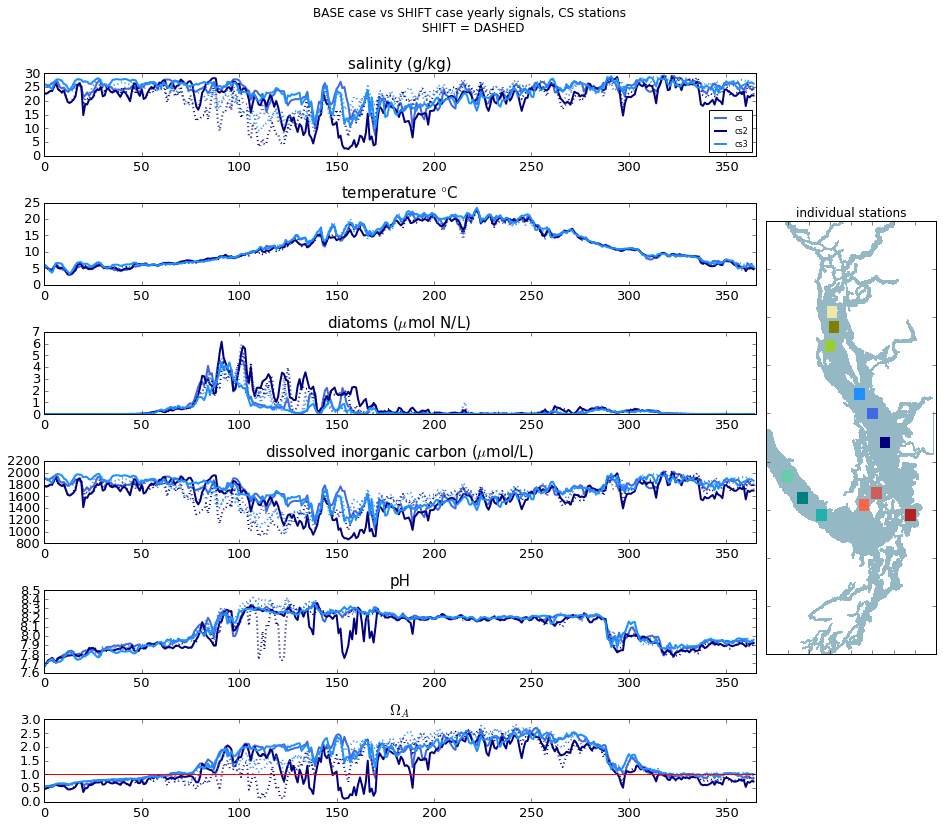

In [11]:
fact = 1.1
fig = plt.figure(figsize=(12*fact,9.9*fact))

daze = np.arange(0,365,1)

ax1 = plt.subplot2grid((6,5), (0,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_sal_cs[0,:], linewidth=2, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze, SHIFT_sal_cs[0,:], linewidth=2, color = cs_col, linestyle = ':')
ax1.plot(daze, BASE_sal_cs2[0,:], linewidth=2, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze, SHIFT_sal_cs2[0,:], linewidth=2, color = cs2_col, linestyle = ':')
ax1.plot(daze, BASE_sal_cs3[0,:], linewidth=2, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze, SHIFT_sal_cs3[0,:], linewidth=2, color = cs3_col, linestyle = ':')
ax1.set_title('salinity (g/kg)', fontsize = 15)
ax1.set_xlim([0,365])
ax1.legend(fontsize = 8, loc = 'best')

ax1 = plt.subplot2grid((6,5), (1,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_temp_cs[0,:], linewidth=2, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze, SHIFT_temp_cs[0,:], linewidth=2, color = cs_col, linestyle = ':')
ax1.plot(daze, BASE_temp_cs2[0,:], linewidth=2, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze, SHIFT_temp_cs2[0,:], linewidth=2, color = cs2_col, linestyle = ':')
ax1.plot(daze, BASE_temp_cs3[0,:], linewidth=2, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze, SHIFT_temp_cs3[0,:], linewidth=2, color = cs3_col, linestyle = ':')
ax1.set_title('temperature $\degree$C', fontsize = 15)
ax1.set_xlim([0,365])

ax1 = plt.subplot2grid((6,5), (2,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_diat_cs[0,:], linewidth=2, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze, SHIFT_diat_cs[0,:], linewidth=2, color = cs_col, linestyle = ':')
ax1.plot(daze, BASE_diat_cs2[0,:], linewidth=2, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze, SHIFT_diat_cs2[0,:], linewidth=2, color = cs2_col, linestyle = ':')
ax1.plot(daze, BASE_diat_cs3[0,:], linewidth=2, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze, SHIFT_diat_cs3[0,:], linewidth=2, color = cs3_col, linestyle = ':')
ax1.set_title('diatoms ($\mu$mol N/L) ', fontsize = 15)
ax1.set_xlim([0,365])

ax1 = plt.subplot2grid((6,5), (3,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_DIC_cs[0,:], linewidth=2, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze, SHIFT_DIC_cs[0,:], linewidth=2, color = cs_col, linestyle = ':')
ax1.plot(daze, BASE_DIC_cs2[0,:], linewidth=2, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze, SHIFT_DIC_cs2[0,:], linewidth=2, color = cs2_col, linestyle = ':')
ax1.plot(daze, BASE_DIC_cs3[0,:], linewidth=2, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze, SHIFT_DIC_cs3[0,:], linewidth=2, color = cs3_col, linestyle = ':')
ax1.set_title('dissolved inorganic carbon ($\mu$mol/L)', fontsize = 15)
ax1.set_xlim([0,365])


ax1 = plt.subplot2grid((6,5), (4,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_pH_cs[0,:], linewidth=2, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze, SHIFT_pH_cs[0,:], linewidth=2, color = cs_col, linestyle = ':')
ax1.plot(daze, BASE_pH_cs2[0,:], linewidth=2, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze, SHIFT_pH_cs2[0,:], linewidth=2, color = cs2_col, linestyle = ':')
ax1.plot(daze, BASE_pH_cs3[0,:], linewidth=2, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze, SHIFT_pH_cs3[0,:], linewidth=2, color = cs3_col, linestyle = ':')
ax1.set_title('pH', fontsize = 15)
ax1.set_xlim([0,365])

ax1 = plt.subplot2grid((6,5), (5,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_OmA_cs[0,:], linewidth=2, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze, SHIFT_OmA_cs[0,:], linewidth=2, color = cs_col, linestyle = ':')
ax1.plot(daze, BASE_OmA_cs2[0,:], linewidth=2, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze, SHIFT_OmA_cs2[0,:], linewidth=2, color = cs2_col, linestyle = ':')
ax1.plot(daze, BASE_OmA_cs3[0,:], linewidth=2, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze, SHIFT_OmA_cs3[0,:], linewidth=2, color = cs3_col, linestyle = ':')
ax1.set_title('$\Omega_A$', fontsize = 15)
ax1.axhline(y=1, color = 'r')
ax1.set_xlim([0,365])

ax0 = plt.subplot2grid((6,5), (0,4), colspan=1, rowspan=6)
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax0.set_title('individual stations')

plt.suptitle('BASE case vs SHIFT case yearly signals, CS stations \n SHIFT = DASHED', fontsize = 12, y = 1.05)

plt.tight_layout()

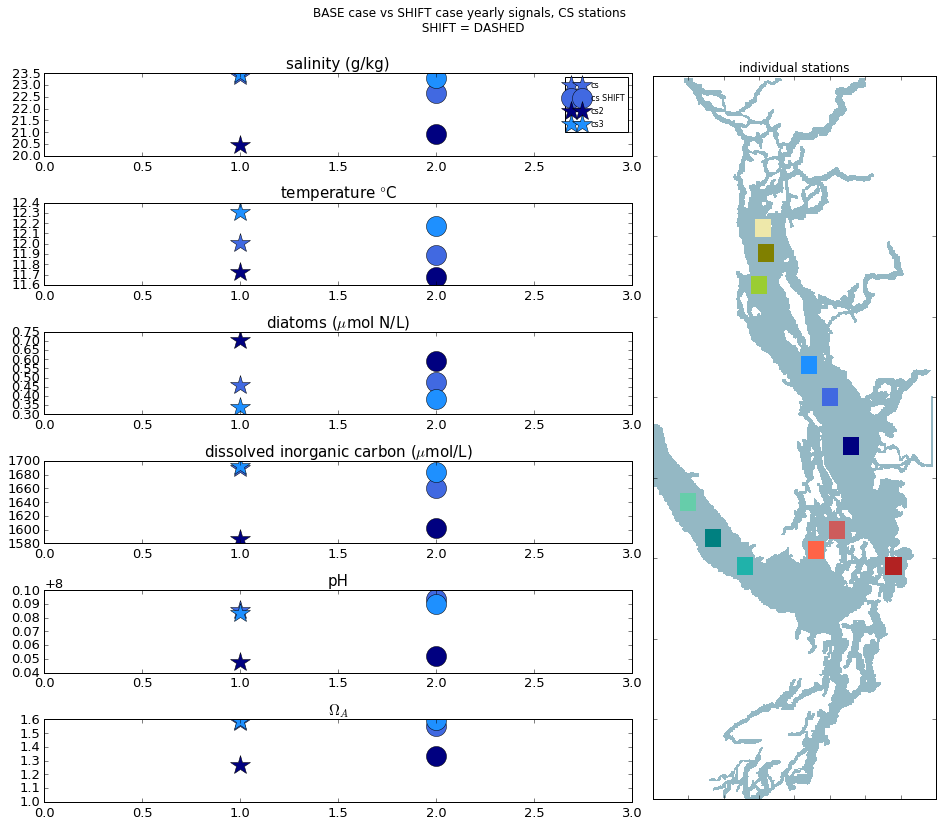

In [28]:
fact = 1.1
fig = plt.figure(figsize=(12*fact,9.9*fact))

daze = np.arange(1,2,1)
daze2 = np.arange(2,3,1)

ax1 = plt.subplot2grid((6,3), (0,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_sal_cs[0,:], axis = 0), marker = '*', markersize = 20, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze2, np.mean(SHIFT_sal_cs[0,:], axis = 0), marker = 'o', markersize = 20, color = cs_col, linestyle = ':', label = 'cs SHIFT')
ax1.plot(daze, np.mean(BASE_sal_cs2[0,:], axis = 0), marker = '*', markersize = 20, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze2, np.mean(SHIFT_sal_cs2[0,:], axis = 0), marker = 'o', markersize = 20, color = cs2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_sal_cs3[0,:], axis = 0), marker = '*', markersize = 20, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze2, np.mean(SHIFT_sal_cs3[0,:], axis = 0), marker = 'o', markersize = 20, color = cs3_col, linestyle = ':')
ax1.set_title('salinity (g/kg)', fontsize = 15)
ax1.set_xlim([0,3])
ax1.legend(fontsize = 8, loc = 'best')

ax1 = plt.subplot2grid((6,3), (1,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_temp_cs[0,:], axis = 0), marker = '*', markersize = 20, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze2, np.mean(SHIFT_temp_cs[0,:], axis = 0), marker = 'o', markersize = 20, color = cs_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_temp_cs2[0,:], axis = 0), marker = '*', markersize = 20, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze2, np.mean(SHIFT_temp_cs2[0,:], axis = 0), marker = 'o', markersize = 20, color = cs2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_temp_cs3[0,:], axis = 0), marker = '*', markersize = 20, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze2, np.mean(SHIFT_temp_cs3[0,:], axis = 0), marker = 'o', markersize = 20, color = cs3_col, linestyle = ':')
ax1.set_title('temperature $\degree$C', fontsize = 15)
ax1.set_xlim([0,3])

ax1 = plt.subplot2grid((6,3), (2,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_diat_cs[0,:], axis = 0), marker = '*', markersize = 20, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze2, np.mean(SHIFT_diat_cs[0,:], axis = 0), marker = 'o', markersize = 20, color = cs_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_diat_cs2[0,:], axis = 0), marker = '*', markersize = 20, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze2, np.mean(SHIFT_diat_cs2[0,:], axis = 0), marker = 'o', markersize = 20, color = cs2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_diat_cs3[0,:], axis = 0), marker = '*', markersize = 20, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze2, np.mean(SHIFT_diat_cs3[0,:], axis = 0), marker = 'o', markersize = 20, color = cs3_col, linestyle = ':')
ax1.set_title('diatoms ($\mu$mol N/L) ', fontsize = 15)
ax1.set_xlim([0,3])

ax1 = plt.subplot2grid((6,3), (3,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_DIC_cs[0,:], axis = 0), marker = '*', markersize = 20, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze2, np.mean(SHIFT_DIC_cs[0,:], axis = 0), marker = 'o', markersize = 20, color = cs_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_DIC_cs2[0,:], axis = 0), marker = '*', markersize = 20, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze2, np.mean(SHIFT_DIC_cs2[0,:], axis = 0), marker = 'o', markersize = 20, color = cs2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_DIC_cs3[0,:], axis = 0), marker = '*', markersize = 20, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze2, np.mean(SHIFT_DIC_cs3[0,:], axis = 0), marker = 'o', markersize = 20, color = cs3_col, linestyle = ':')
ax1.set_title('dissolved inorganic carbon ($\mu$mol/L)', fontsize = 15)
ax1.set_xlim([0,3])


ax1 = plt.subplot2grid((6,3), (4,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_pH_cs[0,:], axis = 0), marker = '*', markersize = 20, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze2, np.mean(SHIFT_pH_cs[0,:], axis = 0), marker = 'o', markersize = 20, color = cs_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_pH_cs2[0,:], axis = 0), marker = '*', markersize = 20, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze2, np.mean(SHIFT_pH_cs2[0,:], axis = 0), marker = 'o', markersize = 20, color = cs2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_pH_cs3[0,:], axis = 0), marker = '*', markersize = 20, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze2, np.mean(SHIFT_pH_cs3[0,:], axis = 0), marker = 'o', markersize = 20, color = cs3_col, linestyle = ':')
ax1.set_title('pH', fontsize = 15)
ax1.set_xlim([0,3])

ax1 = plt.subplot2grid((6,3), (5,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_OmA_cs[0,:], axis = 0), marker = '*', markersize = 20, color = cs_col, linestyle = '-', label = 'cs')
ax1.plot(daze2, np.mean(SHIFT_OmA_cs[0,:], axis = 0), marker = 'o', markersize = 20, color = cs_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_OmA_cs2[0,:], axis = 0), marker = '*', markersize = 20, color = cs2_col, linestyle = '-', label = 'cs2')
ax1.plot(daze2, np.mean(SHIFT_OmA_cs2[0,:], axis = 0), marker = 'o', markersize = 20, color = cs2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_OmA_cs3[0,:], axis = 0), marker = '*', markersize = 20, color = cs3_col, linestyle = '-', label = 'cs3')
ax1.plot(daze2, np.mean(SHIFT_OmA_cs3[0,:], axis = 0), marker = 'o', markersize = 20, color = cs3_col, linestyle = ':')
ax1.set_title('$\Omega_A$', fontsize = 15)
ax1.axhline(y=1, color = 'r')
ax1.set_xlim([0,3])

ax0 = plt.subplot2grid((6,3), (0,2), colspan=1, rowspan=6)
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth = 2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth = 2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth = 2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth = 2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth = 2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth = 2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth = 2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth = 2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth = 2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth = 2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth = 2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth = 2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax0.set_title('individual stations')

plt.suptitle('BASE case vs SHIFT case yearly signals, CS stations \n SHIFT = DASHED', fontsize = 12, y = 1.05)

plt.tight_layout()

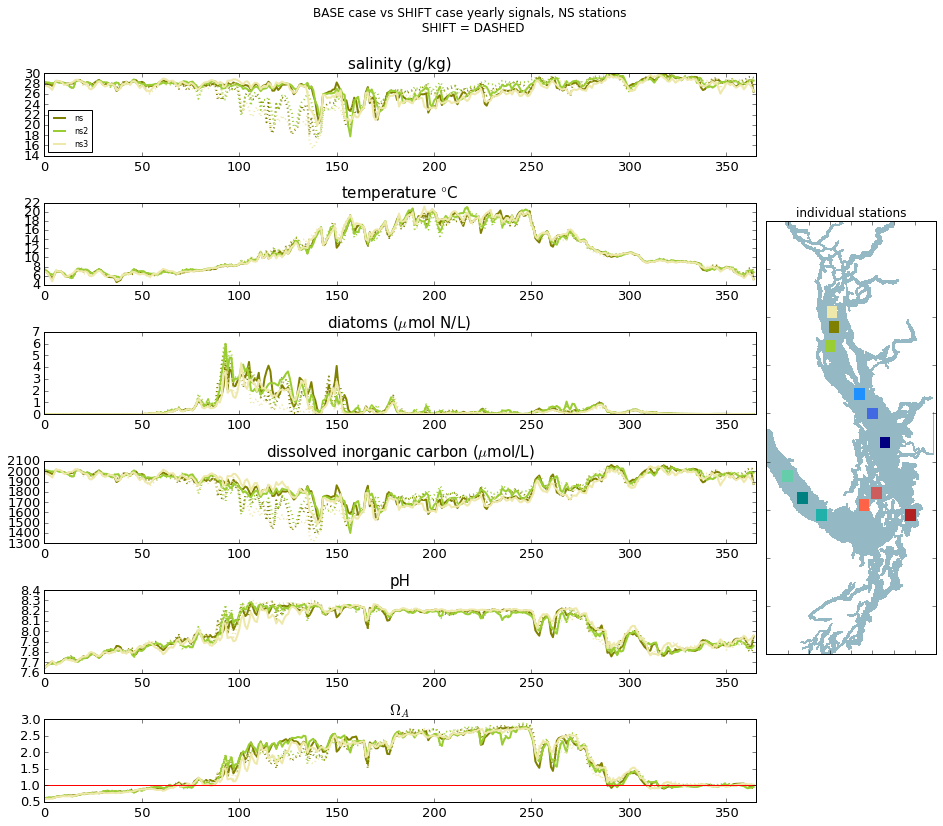

In [12]:
fact = 1.1
fig = plt.figure(figsize=(12*fact,9.9*fact))

daze = np.arange(0,365,1)

ax1 = plt.subplot2grid((6,5), (0,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_sal_ns[0,:], linewidth=2, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze, SHIFT_sal_ns[0,:], linewidth=2, color = ns_col, linestyle = ':')
ax1.plot(daze, BASE_sal_ns2[0,:], linewidth=2, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze, SHIFT_sal_ns2[0,:], linewidth=2, color = ns2_col, linestyle = ':')
ax1.plot(daze, BASE_sal_ns3[0,:], linewidth=2, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze, SHIFT_sal_ns3[0,:], linewidth=2, color = ns3_col, linestyle = ':')
ax1.set_title('salinity (g/kg)', fontsize = 15)
ax1.set_xlim([0,365])
ax1.legend(fontsize = 8, loc = 'best')

ax1 = plt.subplot2grid((6,5), (1,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_temp_ns[0,:], linewidth=2, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze, SHIFT_temp_ns[0,:], linewidth=2, color = ns_col, linestyle = ':')
ax1.plot(daze, BASE_temp_ns2[0,:], linewidth=2, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze, SHIFT_temp_ns2[0,:], linewidth=2, color = ns2_col, linestyle = ':')
ax1.plot(daze, BASE_temp_ns3[0,:], linewidth=2, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze, SHIFT_temp_ns3[0,:], linewidth=2, color = ns3_col, linestyle = ':')
ax1.set_title('temperature $\degree$C', fontsize = 15)
ax1.set_xlim([0,365])

ax1 = plt.subplot2grid((6,5), (2,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_diat_ns[0,:], linewidth=2, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze, SHIFT_diat_ns[0,:], linewidth=2, color = ns_col, linestyle = ':')
ax1.plot(daze, BASE_diat_ns2[0,:], linewidth=2, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze, SHIFT_diat_ns2[0,:], linewidth=2, color = ns2_col, linestyle = ':')
ax1.plot(daze, BASE_diat_ns3[0,:], linewidth=2, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze, SHIFT_diat_ns3[0,:], linewidth=2, color = ns3_col, linestyle = ':')
ax1.set_title('diatoms ($\mu$mol N/L) ', fontsize = 15)
ax1.set_xlim([0,365])

ax1 = plt.subplot2grid((6,5), (3,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_DIC_ns[0,:], linewidth=2, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze, SHIFT_DIC_ns[0,:], linewidth=2, color = ns_col, linestyle = ':')
ax1.plot(daze, BASE_DIC_ns2[0,:], linewidth=2, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze, SHIFT_DIC_ns2[0,:], linewidth=2, color = ns2_col, linestyle = ':')
ax1.plot(daze, BASE_DIC_ns3[0,:], linewidth=2, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze, SHIFT_DIC_ns3[0,:], linewidth=2, color = ns3_col, linestyle = ':')
ax1.set_title('dissolved inorganic carbon ($\mu$mol/L)', fontsize = 15)
ax1.set_xlim([0,365])


ax1 = plt.subplot2grid((6,5), (4,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_pH_ns[0,:], linewidth=2, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze, SHIFT_pH_ns[0,:], linewidth=2, color = ns_col, linestyle = ':')
ax1.plot(daze, BASE_pH_ns2[0,:], linewidth=2, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze, SHIFT_pH_ns2[0,:], linewidth=2, color = ns2_col, linestyle = ':')
ax1.plot(daze, BASE_pH_ns3[0,:], linewidth=2, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze, SHIFT_pH_ns3[0,:], linewidth=2, color = ns3_col, linestyle = ':')
ax1.set_title('pH', fontsize = 15)
ax1.set_xlim([0,365])

ax1 = plt.subplot2grid((6,5), (5,0), colspan=4, rowspan=1)
ax1.plot(daze, BASE_OmA_ns[0,:], linewidth=2, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze, SHIFT_OmA_ns[0,:], linewidth=2, color = ns_col, linestyle = ':')
ax1.plot(daze, BASE_OmA_ns2[0,:], linewidth=2, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze, SHIFT_OmA_ns2[0,:], linewidth=2, color = ns2_col, linestyle = ':')
ax1.plot(daze, BASE_OmA_ns3[0,:], linewidth=2, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze, SHIFT_OmA_ns3[0,:], linewidth=2, color = ns3_col, linestyle = ':')
ax1.set_title('$\Omega_A$', fontsize = 15)
ax1.axhline(y=1, color = 'r')
ax1.set_xlim([0,365])

ax0 = plt.subplot2grid((6,5), (0,4), colspan=1, rowspan=6)
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax0.set_title('individual stations')

plt.suptitle('BASE case vs SHIFT case yearly signals, NS stations \n SHIFT = DASHED', fontsize = 12, y = 1.05)

plt.tight_layout()

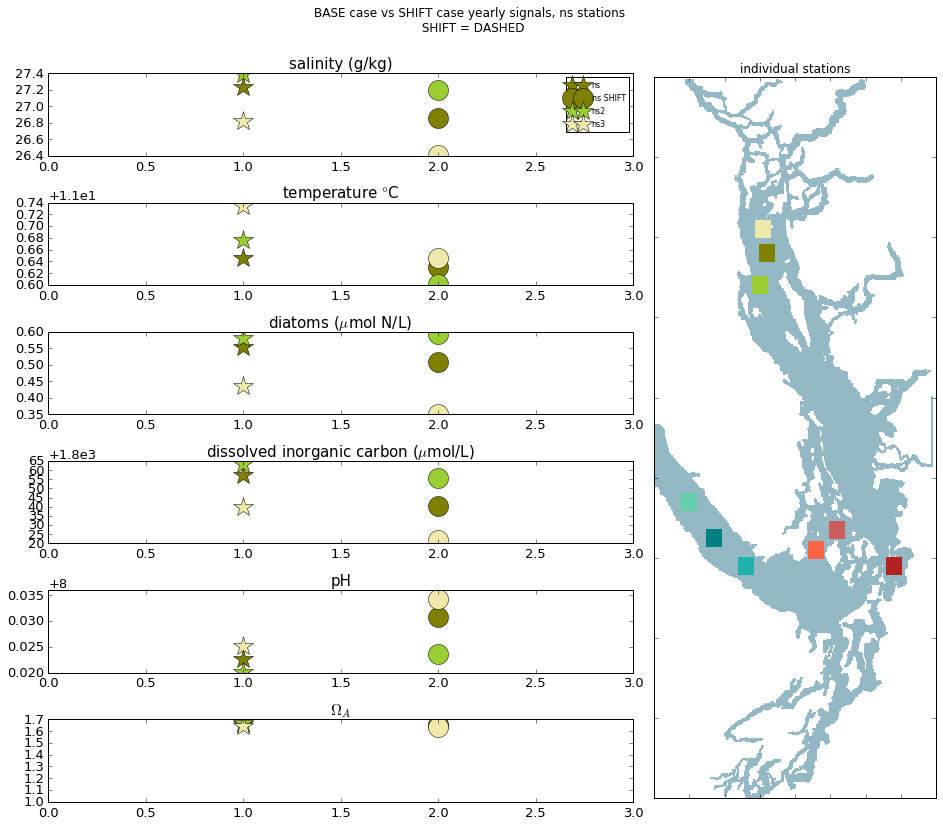

In [29]:
fact = 1.1
fig = plt.figure(figsize=(12*fact,9.9*fact))

daze = np.arange(1,2,1)
daze2 = np.arange(2,3,1)

ax1 = plt.subplot2grid((6,3), (0,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_sal_ns[0,:], axis = 0), marker = '*', markersize = 20, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze2, np.mean(SHIFT_sal_ns[0,:], axis = 0), marker = 'o', markersize = 20, color = ns_col, linestyle = ':', label = 'ns SHIFT')
ax1.plot(daze, np.mean(BASE_sal_ns2[0,:], axis = 0), marker = '*', markersize = 20, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze2, np.mean(SHIFT_sal_ns2[0,:], axis = 0), marker = 'o', markersize = 20, color = ns2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_sal_ns3[0,:], axis = 0), marker = '*', markersize = 20, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze2, np.mean(SHIFT_sal_ns3[0,:], axis = 0), marker = 'o', markersize = 20, color = ns3_col, linestyle = ':')
ax1.set_title('salinity (g/kg)', fontsize = 15)
ax1.set_xlim([0,3])
ax1.legend(fontsize = 8, loc = 'best')

ax1 = plt.subplot2grid((6,3), (1,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_temp_ns[0,:], axis = 0), marker = '*', markersize = 20, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze2, np.mean(SHIFT_temp_ns[0,:], axis = 0), marker = 'o', markersize = 20, color = ns_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_temp_ns2[0,:], axis = 0), marker = '*', markersize = 20, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze2, np.mean(SHIFT_temp_ns2[0,:], axis = 0), marker = 'o', markersize = 20, color = ns2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_temp_ns3[0,:], axis = 0), marker = '*', markersize = 20, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze2, np.mean(SHIFT_temp_ns3[0,:], axis = 0), marker = 'o', markersize = 20, color = ns3_col, linestyle = ':')
ax1.set_title('temperature $\degree$C', fontsize = 15)
ax1.set_xlim([0,3])

ax1 = plt.subplot2grid((6,3), (2,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_diat_ns[0,:], axis = 0), marker = '*', markersize = 20, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze2, np.mean(SHIFT_diat_ns[0,:], axis = 0), marker = 'o', markersize = 20, color = ns_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_diat_ns2[0,:], axis = 0), marker = '*', markersize = 20, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze2, np.mean(SHIFT_diat_ns2[0,:], axis = 0), marker = 'o', markersize = 20, color = ns2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_diat_ns3[0,:], axis = 0), marker = '*', markersize = 20, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze2, np.mean(SHIFT_diat_ns3[0,:], axis = 0), marker = 'o', markersize = 20, color = ns3_col, linestyle = ':')
ax1.set_title('diatoms ($\mu$mol N/L) ', fontsize = 15)
ax1.set_xlim([0,3])

ax1 = plt.subplot2grid((6,3), (3,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_DIC_ns[0,:], axis = 0), marker = '*', markersize = 20, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze2, np.mean(SHIFT_DIC_ns[0,:], axis = 0), marker = 'o', markersize = 20, color = ns_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_DIC_ns2[0,:], axis = 0), marker = '*', markersize = 20, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze2, np.mean(SHIFT_DIC_ns2[0,:], axis = 0), marker = 'o', markersize = 20, color = ns2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_DIC_ns3[0,:], axis = 0), marker = '*', markersize = 20, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze2, np.mean(SHIFT_DIC_ns3[0,:], axis = 0), marker = 'o', markersize = 20, color = ns3_col, linestyle = ':')
ax1.set_title('dissolved inorganic carbon ($\mu$mol/L)', fontsize = 15)
ax1.set_xlim([0,3])


ax1 = plt.subplot2grid((6,3), (4,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_pH_ns[0,:], axis = 0), marker = '*', markersize = 20, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze2, np.mean(SHIFT_pH_ns[0,:], axis = 0), marker = 'o', markersize = 20, color = ns_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_pH_ns2[0,:], axis = 0), marker = '*', markersize = 20, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze2, np.mean(SHIFT_pH_ns2[0,:], axis = 0), marker = 'o', markersize = 20, color = ns2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_pH_ns3[0,:], axis = 0), marker = '*', markersize = 20, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze2, np.mean(SHIFT_pH_ns3[0,:], axis = 0), marker = 'o', markersize = 20, color = ns3_col, linestyle = ':')
ax1.set_title('pH', fontsize = 15)
ax1.set_xlim([0,3])

ax1 = plt.subplot2grid((6,3), (5,0), colspan=2, rowspan=1)
ax1.plot(daze, np.mean(BASE_OmA_ns[0,:], axis = 0), marker = '*', markersize = 20, color = ns_col, linestyle = '-', label = 'ns')
ax1.plot(daze2, np.mean(SHIFT_OmA_ns[0,:], axis = 0), marker = 'o', markersize = 20, color = ns_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_OmA_ns2[0,:], axis = 0), marker = '*', markersize = 20, color = ns2_col, linestyle = '-', label = 'ns2')
ax1.plot(daze2, np.mean(SHIFT_OmA_ns2[0,:], axis = 0), marker = 'o', markersize = 20, color = ns2_col, linestyle = ':')
ax1.plot(daze, np.mean(BASE_OmA_ns3[0,:], axis = 0), marker = '*', markersize = 20, color = ns3_col, linestyle = '-', label = 'ns3')
ax1.plot(daze2, np.mean(SHIFT_OmA_ns3[0,:], axis = 0), marker = 'o', markersize = 20, color = ns3_col, linestyle = ':')
ax1.set_title('$\Omega_A$', fontsize = 15)
ax1.axhline(y=1, color = 'r')
ax1.set_xlim([0,3])

ax0 = plt.subplot2grid((6,3), (0,2), colspan=1, rowspan=6)
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth = 2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth = 2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth = 2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth = 2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth = 2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth = 2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth = 2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth = 2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth = 2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth = 2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth = 2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth = 2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

ax0.set_title('individual stations')

plt.suptitle('BASE case vs SHIFT case yearly signals, ns stations \n SHIFT = DASHED', fontsize = 12, y = 1.05)

plt.tight_layout()

### [B] nice plot - PI5

Text(0.5, 1.0, 'individual stations')

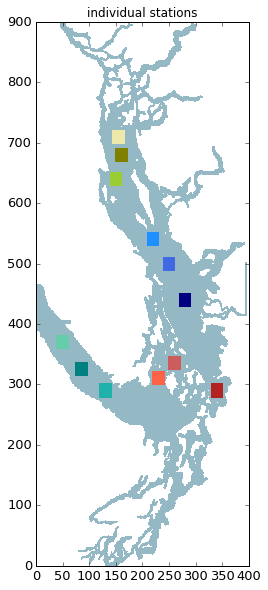

In [13]:


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

ax0.set_title('individual stations')



NameError: name 'BASE_var_jdf' is not defined

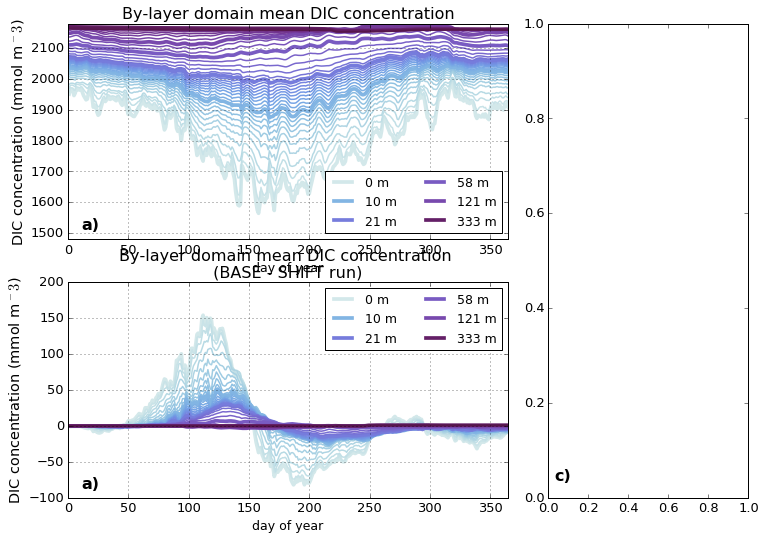

In [14]:
ts = 16 # title font
fs = 14.5 # all other font sizes
fact = 1
lw = 1.5
fig = plt.figure(figsize=(16.5*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])
plt.ylim([1480,2180])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax1 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_var[i,:]-SHIFT_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_var[i,:]-SHIFT_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'upper right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])

plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n (BASE - SHIFT run) ', fontsize = ts)
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs)
# ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
# ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
# ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
# plt.xlim([0,365])
# ax2b.set_ylim([0,130])
# ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BASE_dp = np.nanmean(BASE_var, axis =1)
SHIFT_dp = np.nanmean(SHIFT_var, axis =1)

BASE_jdf_dp = np.nanmean(BASE_var_jdf, axis =1)
SHIFT_jdf_dp = np.nanmean(SHIFT_var_jdf, axis =1)
BASE_cs_dp = np.nanmean(BASE_var_cs, axis =1)
SHIFT_cs_dp = np.nanmean(SHIFT_var_cs, axis =1)
BASE_ns_dp = np.nanmean(BASE_var_ns, axis =1)
SHIFT_ns_dp = np.nanmean(SHIFT_var_ns, axis =1)
BASE_haro_dp = np.nanmean(BASE_var_haro, axis =1)
SHIFT_haro_dp = np.nanmean(SHIFT_var_haro, axis =1)

BASE_jdf2_dp = np.nanmean(BASE_var_jdf2, axis =1)
SHIFT_jdf2_dp = np.nanmean(SHIFT_var_jdf2, axis =1)
BASE_cs2_dp = np.nanmean(BASE_var_cs2, axis =1)
SHIFT_cs2_dp = np.nanmean(SHIFT_var_cs2, axis =1)
BASE_ns2_dp = np.nanmean(BASE_var_ns2, axis =1)
SHIFT_ns2_dp = np.nanmean(SHIFT_var_ns2, axis =1)
BASE_haro2_dp = np.nanmean(BASE_var_haro2, axis =1)
SHIFT_haro2_dp = np.nanmean(SHIFT_var_haro2, axis =1)

BASE_jdf3_dp = np.nanmean(BASE_var_jdf3, axis =1)
SHIFT_jdf3_dp = np.nanmean(SHIFT_var_jdf3, axis =1)
BASE_cs3_dp = np.nanmean(BASE_var_cs3, axis =1)
SHIFT_cs3_dp = np.nanmean(SHIFT_var_cs3, axis =1)
BASE_ns3_dp = np.nanmean(BASE_var_ns3, axis =1)
SHIFT_ns3_dp = np.nanmean(SHIFT_var_ns3, axis =1)
BASE_haro3_dp = np.nanmean(BASE_var_haro3, axis =1)
SHIFT_haro3_dp = np.nanmean(SHIFT_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

ax3.plot(BASE_jdf_dp-SHIFT_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-SHIFT_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-SHIFT_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BASE_cs_dp-SHIFT_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-SHIFT_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-SHIFT_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BASE_ns_dp-SHIFT_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-SHIFT_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-SHIFT_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BASE_haro_dp-SHIFT_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-SHIFT_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-SHIFT_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-SHIFT_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')


ax3.set_title('Mean extra DIC by depth \n (BASE - SHIFT run) ', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


fig.tight_layout()
#plt.savefig('Fig2.png')





In [ ]:
depths = mesh['gdept_1d'][:]
zdepth = depths[0] 

fig = plt.figure(figsize=(16.5*fact, 8.5*fact))

ax3 = plt.subplot2grid((1,4), (0,0), colspan=1, rowspan=1)
ax3.plot(BASE_jdf_dp-SHIFT_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-SHIFT_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-SHIFT_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,1), colspan=1, rowspan=1)
ax3.plot(BASE_cs_dp-SHIFT_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-SHIFT_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-SHIFT_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,2), colspan=1, rowspan=1)
ax3.plot(BASE_ns_dp-SHIFT_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-SHIFT_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-SHIFT_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,3), colspan=1, rowspan=1)
ax3.plot(BASE_haro_dp-SHIFT_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-SHIFT_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-SHIFT_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-SHIFT_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)
plt.suptitle('BASE-SHIFT', fontsize = fs+2)
plt.tight_layout()